Importando Bibliotecas 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pandas import read_csv
from sklearn.metrics import classification_report, confusion_matrix 
%pylab inline
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

Populating the interactive namespace from numpy and matplotlib


In [3]:
uri = '/content/drive/Shareddrives/Colab_Grupo2/Colab/Data/dataFrameSelecionado'
data = pd.read_csv(uri)

Carregando base de dados

In [4]:
data.columns

Index(['follow_up_classified', 'id', 'contraceptive_method___1',
       'family_cancer_id___6', 'er_ihc', 'pr_ihc', 'tumor_subtype',
       'follow_up_days', 'ultinfo', 'reclocal', 'recregio', 'recdist',
       'basediag', 'descmorfo', 'tumor_stage', 't', 'm', 'treatment_time',
       'her2_ihc', 'recidive'],
      dtype='object')

In [5]:
#split dataset in features and target variable
feature_cols = ['follow_up_classified', 'contraceptive_method___1',
       'family_cancer_id___6', 'er_ihc', 'pr_ihc', 'tumor_subtype',
       'follow_up_days', 'ultinfo', 'reclocal', 'recregio', 'recdist',
       'basediag', 'descmorfo', 'tumor_stage', 't', 'm', 'treatment_time',
       'her2_ihc', 'recidive']
X = data[feature_cols].drop(['follow_up_classified', 'follow_up_days'], axis=1) # Features
y = data.follow_up_classified # Variável target

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123) # 80% training and 20% test


In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [8]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8115577889447236


In [9]:
#Avaliando sem o uso de hiperparâmetros
print('Classification metrics: \n', classification_report(y_test, y_pred))

#Medindo a taxa de erro do modelo

mse = metrics.mean_squared_error(y_test, y_pred)

print('MSE (Mean-Squared-Error): %s' %mse)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.72      0.67      0.70       174
           1       0.84      0.88      0.86       479
           2       0.83      0.79      0.81       134
           3       0.50      0.33      0.40         9

    accuracy                           0.81       796
   macro avg       0.72      0.67      0.69       796
weighted avg       0.81      0.81      0.81       796

MSE (Mean-Squared-Error): 0.2185929648241206


In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8555276381909548


MSE (Mean-Squared-Error): 0.14824120603015076
Accuracy: 0.8555276381909548


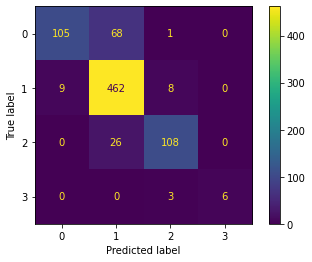

In [11]:
mse = metrics.mean_squared_error(y_test, y_pred)
acu = metrics.accuracy_score(y_test, y_pred) 

print('MSE (Mean-Squared-Error): %s' %mse)
print('Accuracy: %s' %acu)

#Medir a taxa de erro e a acurácia do modelo

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


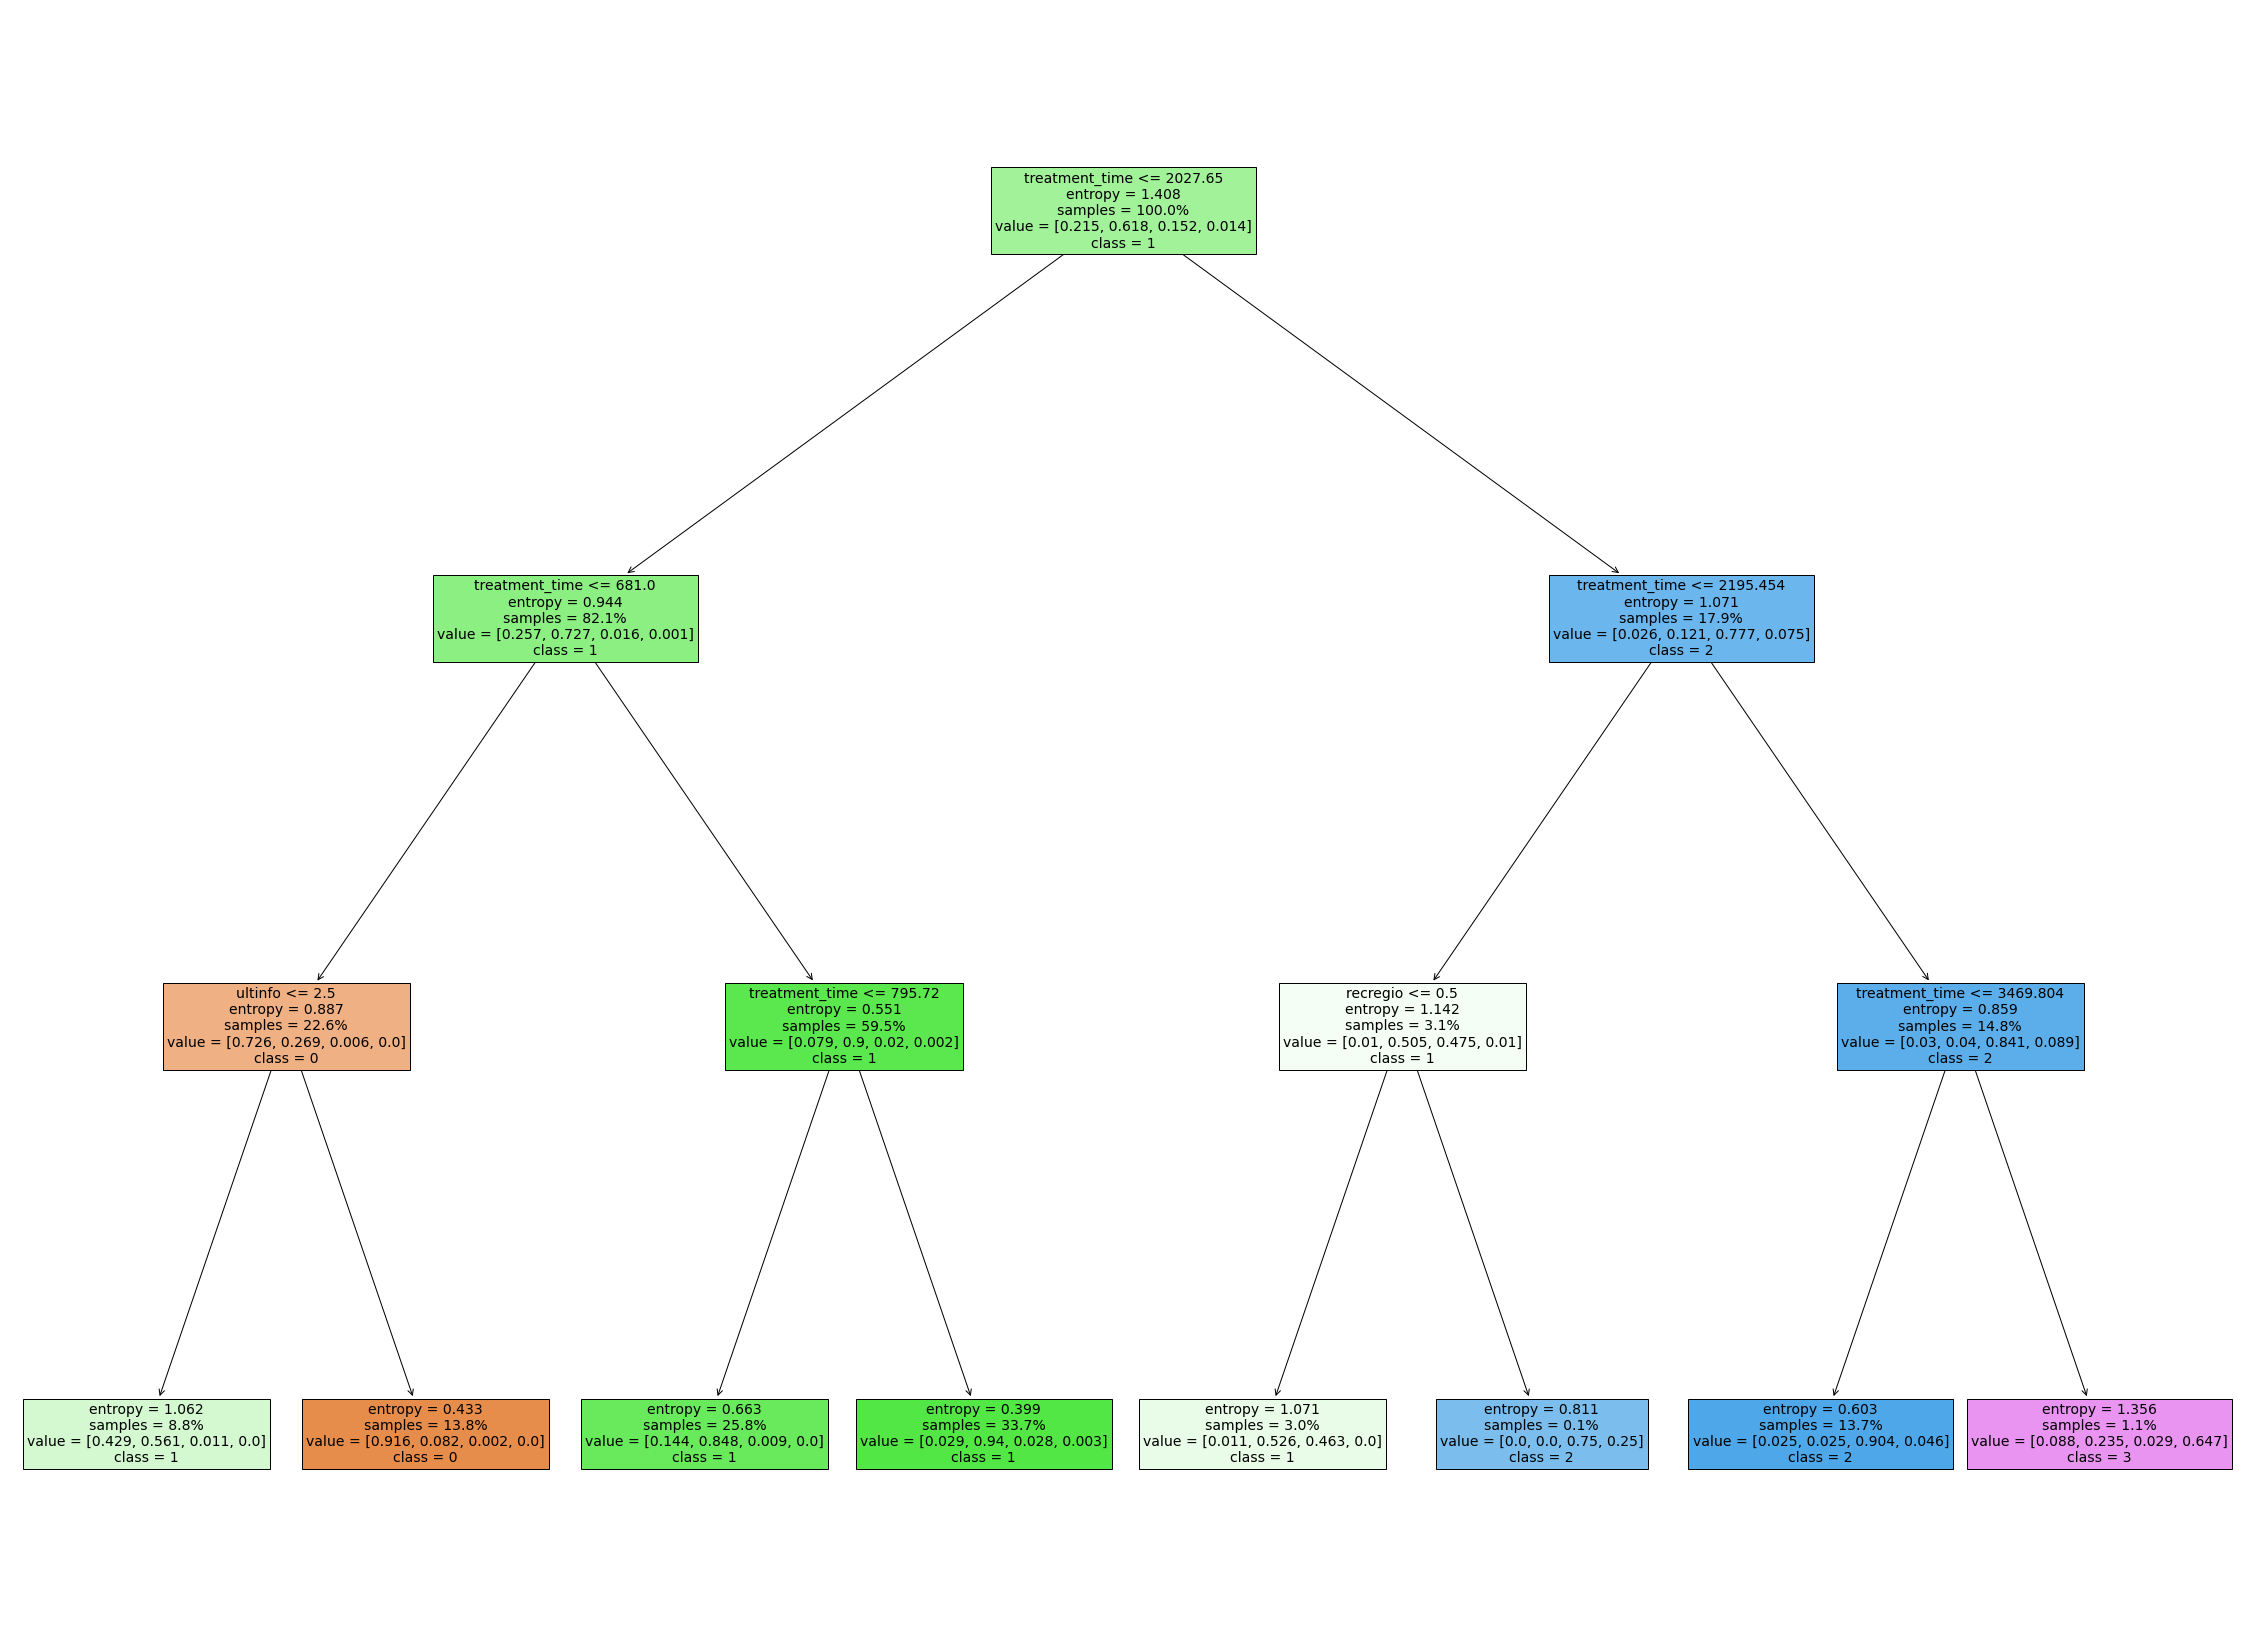

In [12]:
pylab.figure(figsize=(40, 30))
tree.plot_tree(clf,
               feature_names = X_train.columns, 
               class_names=['0', '1', '2', '3'],
               filled = True,
               proportion=True,
               max_depth= 10,
               fontsize=14,
               );
plt.savefig("decision_tree.png")

#Plotar árvore de decisão e salvar como imagem

In [ ]:

grid_search_cv = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state = 37),
    param_grid = {
        'max_depth':range(1,50)
    }, # Testando comprimentos máximos de 1 a 50
    scoring='roc_auc',
    cv = 3)

# Realizando a otimização por GridSearch para os dados de cancer de mama:
grid_search_cv.fit(X,y)
#Vamos ver informações relevantes:
print('Melhor comprimento máximo: {}'.format(grid_search_cv.best_params_['max_depth']))
print('Desempenho AUC-ROC do melhor modelo: {}'.format(round(grid_search_cv.best_score_,3)))
print('Tempo para realizar a otimização:')
%timeit -n 1 -r 1 grid_search_cv.fit(X,y)

In [14]:
grid_search_cv = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 37),
                              param_grid = {
                                  'max_depth':range(1,50)
                              }, # Testando comprimentos máximos de 1 a 50
                              scoring='f1_macro', cv = 3)

# Realizando a otimização por GridSearch para os dados de cancer de mama:
grid_search_cv.fit(X,y)
#Vamos ver informações relevantes:
print('Melhor comprimento máximo: {}'.format(grid_search_cv.best_params_['max_depth']))
print('Desempenho AUC-ROC do melhor modelo: {}'.format(round(grid_search_cv.best_score_,3)))
print('Tempo para realizar a otimização:')
%timeit -n 1 -r 1 grid_search_cv.fit(X,y)

Melhor comprimento máximo: 4
Desempenho AUC-ROC do melhor modelo: 0.749
Tempo para realizar a otimização:
1.81 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [15]:
y_pred = grid_search_cv.predict(X_test)

In [16]:
#Construindo a base do Pipeline
pipe_rf = Pipeline([('rf_RandomGrid', DecisionTreeClassifier(random_state=123))])

In [17]:
#Treinando o modelo com Pipeline
model = pipe_rf.fit(X_train, y_train)

In [18]:
#Calculando y_score
y_score = model.predict_proba(X_test)

In [19]:
#Declarando valores unicos de classes em ordem
n_binaries = y_test.unique()
n_binaries.sort()

#Binarizando a saída
y_test_bin = label_binarize(y_test, classes=n_binaries)
n_classes = y_test_bin.shape[1]

AUC for Class 1: 0.8186190264996118
AUC for Class 2: 0.8145387011584335
AUC for Class 3: 0.876555665779862
AUC for Class 4: 0.718269095016236


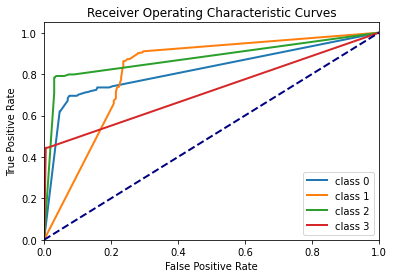

In [20]:
#Calculando e exibindo curva ROC das classes
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--' )
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

In [21]:
#Avaliando com o uso de hiperparâmetros
print('Classification metrics: \n', classification_report(y_test, y_pred))

#Medindo a taxa de erro do modelo

mse = metrics.mean_squared_error(y_test, y_pred)

print('MSE (Mean-Squared-Error): %s' %mse)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.93      0.66      0.77       174
           1       0.86      0.95      0.90       479
           2       0.86      0.90      0.88       134
           3       1.00      0.56      0.71         9

    accuracy                           0.87       796
   macro avg       0.91      0.77      0.82       796
weighted avg       0.88      0.87      0.87       796

MSE (Mean-Squared-Error): 0.135678391959799
